In [1]:
from data_structures.cfr_trees import CFRTree
from data_structures.kuhn_trees import build_kuhn_tree
from cfr_code.sample_cfr import SolveWithSampleCFR
from utilities.graphs import graphs_from_cfr_results

In [2]:
kuhn_tree = build_kuhn_tree(2, 3)

In [3]:
cfr_tree = CFRTree(kuhn_tree)

In [4]:
%time res = SolveWithSampleCFR(cfr_tree, 100000, checkEveryIteration = 1000, show_perc = True)

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
CPU times: user 15.1 s, sys: 0 ns, total: 15.1 s
Wall time: 15.1 s


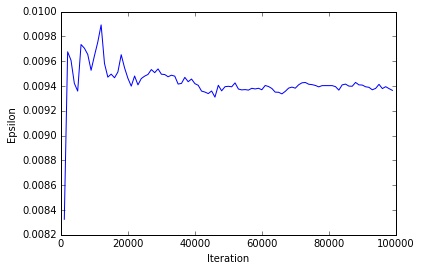

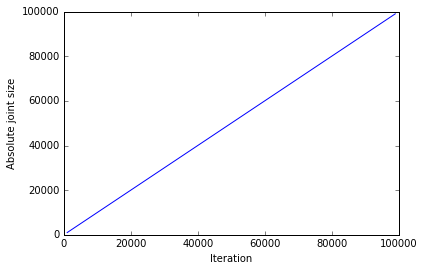

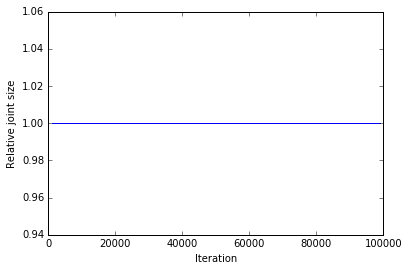

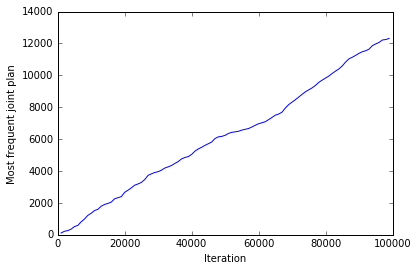

In [5]:
graphs_from_cfr_results(res)

# Kuhn equilibrium plans interpretation

In [9]:
from data_structures.cfr_trees import CFRJointStrategy

In [10]:
big_plans = list(map(lambda el: (CFRJointStrategy.stringToActionPlan(el[0]), el[1]), 
                     filter(lambda el: el[1] > 0, res['joint'].plans.items())))
print("There are " + str(len(big_plans)) + " big plans")
print("They cover " + str(sum(map(lambda el: el[1], big_plans)) / res['joint'].frequencyCount * 100) + 
      "% of samples")

There are 88 big plans
They cover 100.0% of samples


In [11]:
def kuhn_tree_traverse_via_action_plan(node, action_plan):
    if(node.isChance()):
        results = []
        for i in range(len(node.children)):
            r = node.actionNames[i] + " - " + kuhn_tree_traverse_via_action_plan(node.children[i], action_plan)
            results.append(r)
        return results
    
    if(node.isLeaf()):
        return ""
    
    a = action_plan[node.information_set]
    action_name = node.actionNames[a]
    return action_name + " - " + kuhn_tree_traverse_via_action_plan(node.children[a], action_plan)

In [12]:
plans = {}
total_frequency = res['joint'].frequencyCount
for p in big_plans:
    for s in kuhn_tree_traverse_via_action_plan(kuhn_tree.root, p[0]):
        #print(s + str(p[1]))
        if(s in plans):
            plans[s] += p[1] / total_frequency
        else:
            plans[s] = p[1] / total_frequency

In [13]:
to_del = []
for (p, f) in plans.items():
    if(f < 0.01):
        to_del.append(p)
for p in to_del:
    del plans[p]
plans

{'[0, 1] - p0b - p1b - ': 0.08376000000000001,
 '[0, 1] - p0b - p1f - ': 0.15059999999999998,
 '[0, 1] - p0c - p1c - ': 0.7656100000000001,
 '[0, 2] - p0b - p1b - ': 0.23427000000000003,
 '[0, 2] - p0c - p1b - p0f - ': 0.7656100000000001,
 '[1, 0] - p0b - p1f - ': 0.02366,
 '[1, 0] - p0c - p1b - p0b - ': 0.18891999999999998,
 '[1, 0] - p0c - p1b - p0f - ': 0.14445999999999998,
 '[1, 0] - p0c - p1c - ': 0.6429400000000001,
 '[1, 2] - p0b - p1b - ': 0.02363,
 '[1, 2] - p0c - p1b - p0b - ': 0.55686,
 '[1, 2] - p0c - p1b - p0f - ': 0.41942,
 '[2, 0] - p0b - p1f - ': 0.7034499999999999,
 '[2, 0] - p0c - p1b - p0b - ': 0.10278,
 '[2, 0] - p0c - p1c - ': 0.19368000000000005,
 '[2, 1] - p0b - p1b - ': 0.25963,
 '[2, 1] - p0b - p1f - ': 0.44387999999999994,
 '[2, 1] - p0c - p1c - ': 0.29640999999999995}